# Becoming an Independent Data Scientist
# Dataset link:https://datahub.io/core/covid-19#

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import numpy as np

%matplotlib notebook

In [2]:
plt.style.use('seaborn')

In [3]:
df_confirmed = pd.read_csv('us_confirmed.csv')


In [4]:
df_death = pd.read_csv('us_deaths.csv')

In [5]:
df_death.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Population,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-26,0,-170.132,US,American Samoa


In [5]:
zip_generator = df_confirmed['Date'].apply(lambda string: (string[0:4], string[5:]))
df_confirmed['Year'], df_confirmed['Month_Day'] = zip(*zip_generator)

In [6]:
zip_generator = df_death['Date'].apply(lambda string: (string[0:4], string[5:]))
df_death['Year'], df_death['Month_Day'] = zip(*zip_generator)

In [47]:
df_death.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Population,Date,Case,Long,Country/Region,Province/State,Year,Month_Day
440230,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",0,2020-05-31,7,-111.914512,US,Utah,2020,05-31
440231,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",0,2020-06-01,7,-111.914512,US,Utah,2020,06-01
440232,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",0,2020-06-02,7,-111.914512,US,Utah,2020,06-02
440233,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",0,2020-06-03,7,-111.914512,US,Utah,2020,06-03
440234,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",0,2020-06-04,7,-111.914512,US,Utah,2020,06-04


In [7]:
confirmed_case = df_confirmed[df_confirmed['Province/State']=='Michigan'].groupby('Month_Day').aggregate({'Case':'sum'})
date_index = np.arange('2020-01-22','2020-06-05', dtype='datetime64[D]')

In [8]:
death = df_death[df_death['Province/State']=='Michigan'].groupby('Month_Day').aggregate({'Case':'sum'})

<IPython.core.display.Javascript object>


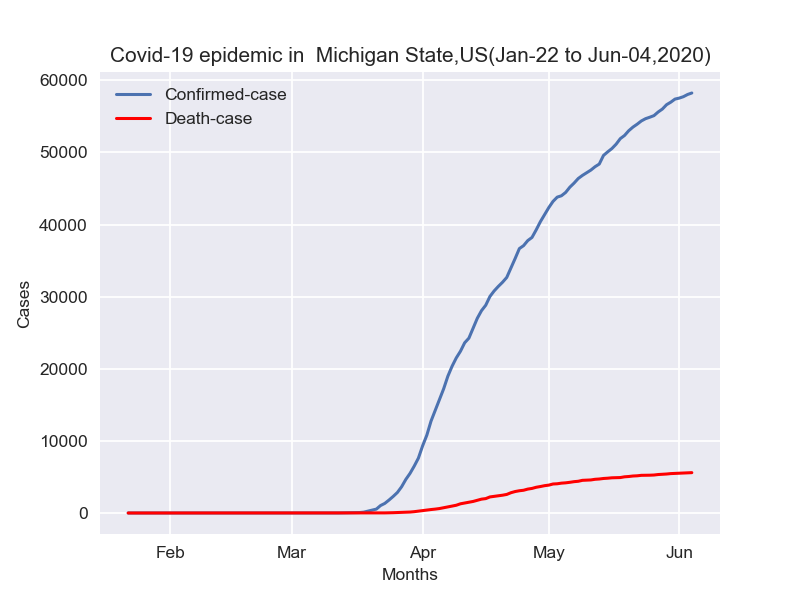

In [12]:
plt.figure()
plt.plot(date_index,confirmed_case.Case.values,label='Confirmed-case')
plt.plot(date_index,death.Case.values,'-r',label='Death-case')
plt.xlabel('Months', fontsize=10)
plt.ylabel('Cases', fontsize=10)
plt.title('Covid-19 epidemic in  Michigan State,US(Jan-22 to Jun-04,2020)', fontsize=12)
plt.legend(frameon=False)
ax=plt.gca()

ax.xaxis.set_major_locator(dates.MonthLocator())

ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))

